# Visualizations

---

### Importing Packages & Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import stop_words
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Reading in the Data:

In [2]:
df = pd.read_csv('./Datasets/Final_Reddit_Dataset_CLEAN.csv')
df.head()

,author,domain,num_comments,title,subreddit,url,subreddit_class,word_count,num_stopwords
0,neutronfish,worldofweirdthings.com,7,"Scientists and bureaucrats are really, really ...",EverythingScience,https://worldofweirdthings.com/2018/10/03/the-...,0,26,7
1,mvea,techdirt.com,43,School Boots Professor Off Campus After He Exp...,EverythingScience,https://www.techdirt.com/articles/20181209/145...,0,14,0
2,KnowableMag,sciencenews.org,4,A gut-brain link for Parkinson’s gets a closer...,EverythingScience,https://www.sciencenews.org/article/parkinsons...,0,20,5
3,BlankVerse,theguardian.com,0,The untold story of how India's sex workers pr...,EverythingScience,https://www.theguardian.com/global-development...,0,33,11
4,clayt6,astronomy.com,2,Satellite images of penguin poop-stains in Ant...,EverythingScience,http://www.astronomy.com/news/2018/12/penguin-...,0,42,17


### Modeling

In [3]:
X = df['title']
y = df['subreddit_class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [5]:
tf = TfidfVectorizer()
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

### Logistic Regression: Default Parameters

In [6]:
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

lr.fit(X_train_tf, y_train)

print('LogReg Train Score:', lr.score(X_train_tf, y_train))
print('LogReg Test Score:', lr.score(X_test_tf, y_test))

LogReg Train Score: 0.9164926931106472
LogReg Test Score: 0.7035490605427975


### Logistic Regression: Optimized Parameters

In [7]:
logreg_pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

params={
    'tf__stop_words': [None], # 'english'
    'tf__max_features': [None], # 5000, 2000, 3000, 4000
    'tf__ngram_range': [(1, 1), (1, 2), (1, 3)], # (1, 5), (1, 4)
    #'tf__max_df': [2, 5, 7],
    #'tf__min_df': [1, 2, 3],
    'tf__smooth_idf': [True, False],
    'lr__class_weight': [None], # {1: .45}
    'lr__penalty': ['l2', 'l1'],
    'lr__C': [1.0, .5, .01]
}
gs_lr_tf = GridSearchCV(logreg_pipe, param_grid=params, return_train_score=True)
gs_lr_tf_fit = gs_lr_tf.fit(X_train, y_train)

print('GridSearch Best Score:', gs_lr_tf.best_score_)
print('GridSearch Best Params:',gs_lr_tf.best_params_)
print()
print('LogReg Train Score:', gs_lr_tf.score(X_train, y_train))
print('LogReg Test Score:', gs_lr_tf.score(X_test, y_test))

lr_preds = gs_lr_tf.predict(X_test)

GridSearch Best Score: 0.7042449547668754
GridSearch Best Params: {'lr__C': 0.5, 'lr__class_weight': None, 'lr__penalty': 'l2', 'tf__max_features': None, 'tf__ngram_range': (1, 2), 'tf__smooth_idf': True, 'tf__stop_words': None}

LogReg Train Score: 0.9227557411273486
LogReg Test Score: 0.7265135699373695


### Random Forest: Default Parameters

In [8]:
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

rf.fit(X_train_tf, y_train)

print('LogReg Train Score:', rf.score(X_train_tf, y_train))
print('LogReg Test Score:', rf.score(X_test_tf, y_test))

LogReg Train Score: 0.9791231732776617
LogReg Test Score: 0.6722338204592901


### Random Forest: Optimized Parameters

In [9]:
rf_pipe = Pipeline([
    ('tf', tf),
    ('rf', rf)
])

params={
    'tf__stop_words': [None], # 'english'
    'tf__max_features': [4000], # 3000, 5000
    'tf__ngram_range': [(1, 2), (1, 3), (1, 4)], # (1, 1), (1, 5)
    'tf__smooth_idf': [True], # False
    'rf__n_estimators': [10, 50], # 100
    'rf__criterion': ['gini', 'entropy'], # 
    'rf__max_depth': [None], # 1, 2, 3, 4
    'rf__max_features': ['auto'] #1.0, .5
}
gs_rf_tf = GridSearchCV(rf_pipe, param_grid=params, return_train_score=True)
gs_rf_tf.fit(X_train, y_train)

print('GridSearch Best Score:', gs_rf_tf.best_score_)
print('GridSearch Best Params:',gs_rf_tf.best_params_)
print()
print('RF Train Score:', gs_rf_tf.score(X_train, y_train))
print('RF Test Score:', gs_rf_tf.score(X_test, y_test))

rf_preds = gs_rf_tf.predict(X_test)

GridSearch Best Score: 0.6896311760612387
GridSearch Best Params: {'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__max_features': 'auto', 'rf__n_estimators': 50, 'tf__max_features': 4000, 'tf__ngram_range': (1, 3), 'tf__smooth_idf': True, 'tf__stop_words': None}

RF Train Score: 0.9930410577592206
RF Test Score: 0.7202505219206681


---

# Interpreting the Results

### Confusion Matrices

In [10]:
# Logistic Regression Predictions

cm_lr = confusion_matrix(y_test, lr_preds)
lr_df = pd.DataFrame(cm_lr, columns=['pred_neg', 'pred_pos'], index=['actual_neg', 'actual_pos'])
lr_df

,pred_neg,pred_pos
actual_neg,195,65
actual_pos,66,153


In [11]:
# Random Forest Predictions

cm_rf = confusion_matrix(y_test, rf_preds)
rf_df = pd.DataFrame(cm_rf, columns=['pred_neg', 'pred_pos'], index=['actual_neg', 'actual_pos'])
rf_df

,pred_neg,pred_pos
actual_neg,207,53
actual_pos,81,138


### Cross-Validation Statistics

In [12]:
# Gridsearched Logistic Regression model:

logreg_scores = pd.DataFrame(gs_lr_tf.cv_results_)

logreg_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__class_weight,param_lr__penalty,param_tf__max_features,param_tf__ngram_range,param_tf__smooth_idf,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.025498,0.003579,0.008062,0.000044,1,None,l2,None,"(1, 1)",True,...,0.684760,0.682008,0.693111,0.013778,7,0.944619,0.945720,0.941606,0.943982,0.001739
1,0.023071,0.000124,0.008093,0.000110,1,None,l2,None,"(1, 1)",False,...,0.678497,0.679916,0.686152,0.009825,12,0.951933,0.950939,0.946820,0.949897,0.002214
2,0.059342,0.001234,0.014394,0.000126,1,None,l2,None,"(1, 2)",True,...,0.695198,0.684100,0.693111,0.006657,7,0.985371,0.983299,0.982273,0.983648,0.001289
3,0.062999,0.006125,0.014430,0.000150,1,None,l2,None,"(1, 2)",False,...,0.699374,0.679916,0.693111,0.009319,7,0.990596,0.987474,0.986444,0.988171,0.001765
4,0.104794,0.003551,0.019630,0.000166,1,None,l2,None,"(1, 3)",True,...,0.691023,0.686192,0.693111,0.006653,7,0.994775,0.994781,0.992701,0.994086,0.000979


In [13]:
# Gridsearched Random Forest model:

rf_scores = pd.DataFrame(gs_rf_tf.cv_results_)

rf_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__criterion,param_rf__max_depth,param_rf__max_features,param_rf__n_estimators,param_tf__max_features,param_tf__ngram_range,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.095127,0.006774,0.016518,0.000027,gini,None,auto,10,4000,"(1, 2)",...,0.659708,0.619247,0.645790,0.018748,11,0.982236,0.980167,0.976017,0.979473,0.002586
1,0.135356,0.005405,0.021603,0.000402,gini,None,auto,10,4000,"(1, 3)",...,0.651357,0.629707,0.647878,0.013612,9,0.979101,0.977035,0.971846,0.975994,0.003052
2,0.187721,0.003727,0.026283,0.000926,gini,None,auto,10,4000,"(1, 4)",...,0.649269,0.629707,0.639527,0.007982,12,0.978056,0.971816,0.972888,0.974254,0.002724
3,0.222754,0.001432,0.025557,0.000115,gini,None,auto,50,4000,"(1, 2)",...,0.672234,0.684100,0.677105,0.005066,6,0.995820,0.996868,0.995829,0.996173,0.000492
4,0.265976,0.002910,0.030521,0.000394,gini,None,auto,50,4000,"(1, 3)",...,0.693111,0.679916,0.689631,0.006948,1,0.996865,0.996868,0.995829,0.996521,0.000489


### Top Words

In [14]:
lr_words = pd.DataFrame(logreg_pipe.named_steps['lr'].coef_, 
                        columns=[logreg_pipe.named_steps['tf'].get_feature_names()]).T

top_lr_words = [lr_words[0].abs().sort_values(ascending=False)][:30]

top_lr_words

[in              2.961455
 science         2.413186
 and             1.991791
 of              1.761679
 trump           1.537756
 climate         1.481126
 study           1.404956
 finds           1.367595
 by              1.367103
 is              1.362622
 their           1.210225
 why             1.136710
 that            1.134629
 they            1.115566
 have            1.114520
 we              1.049861
 mental          1.044409
 how             1.015200
 than            0.972698
 what            0.926441
 suggests        0.912485
 one             0.909642
 be              0.896778
 like            0.893172
 between         0.890270
 could           0.880591
 change          0.872085
 data            0.872084
 malaria         0.841005
 us              0.837625
                   ...   
 variation       0.002521
 mostly          0.002443
 manufactured    0.002388
 providing       0.002210
 incidents       0.002138
 simulate        0.002040
 occurred        0.002026
 normal     

In [15]:
rf_words = pd.DataFrame(rf_pipe.named_steps['rf'].feature_importances_, 
                        index=[rf_pipe.named_steps['tf'].get_feature_names()])



top_rf_words = [rf_words[0].abs().sort_values(ascending=False)[:30]]
top_rf_words

[in             0.020142
 and            0.016624
 of             0.016378
 study          0.014722
 the            0.013331
 have           0.009396
 is             0.008915
 science        0.008776
 by             0.007051
 to             0.006491
 could          0.006278
 found          0.005674
 new            0.005503
 their          0.005160
 on             0.005025
 finds          0.004637
 for            0.004636
 researchers    0.004453
 use            0.004027
 change         0.003978
 between        0.003894
 what           0.003674
 how            0.003602
 men            0.003377
 data           0.003245
 may            0.003071
 high           0.003064
 scientists     0.003059
 be             0.003018
 why            0.003002
 Name: 0, dtype: float64]

In [16]:
corpus = [x for x in df['title']]

vect = CountVectorizer(stop_words='english')
X_text = vect.fit_transform(corpus)

text = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())
text.index = df['subreddit_class']

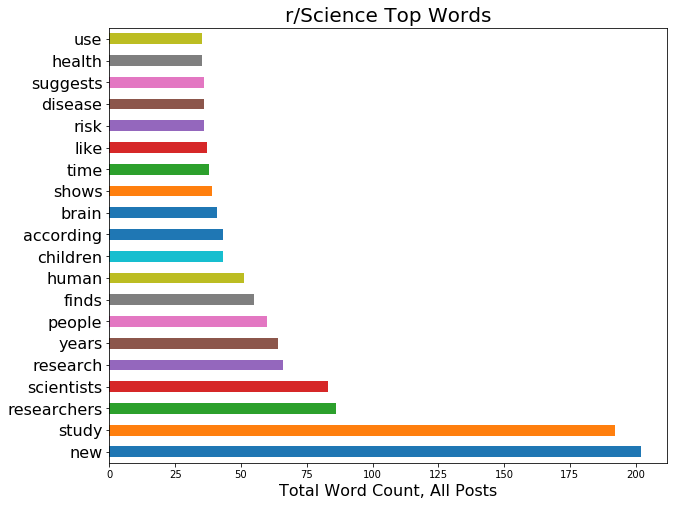

In [17]:
plt.figure(figsize=(10, 8))
text[text.index == 1].sum().sort_values(ascending=False).head(20).plot(kind="barh")
plt.title('r/Science Top Words', fontsize=20)
plt.xlabel('Total Word Count, All Posts', fontsize=16)
plt.yticks(fontsize=16)
plt.show()

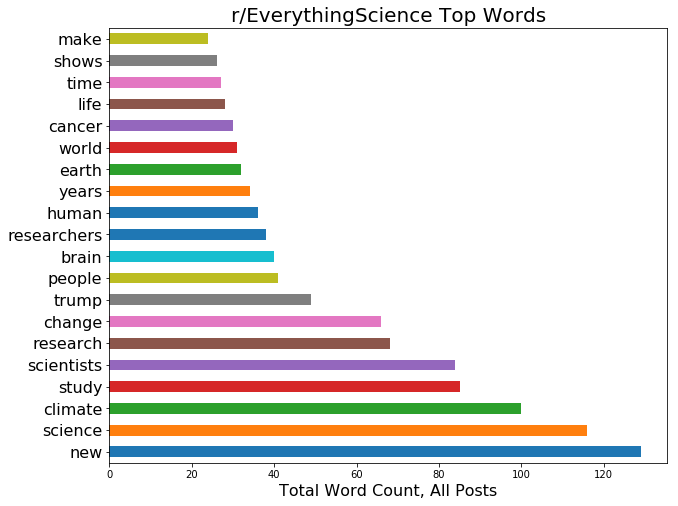

In [18]:
plt.figure(figsize=(10, 8))
text[text.index == 0].sum().sort_values(ascending=False).head(20).plot(kind="barh")
plt.title('r/EverythingScience Top Words', fontsize=20)
plt.xlabel('Total Word Count, All Posts', fontsize=16)
plt.yticks(fontsize=16)
plt.show()